In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import sys
sys.path.append('../src/')
import img_util as util
import cv2
import imp
imp.reload(util)

<module 'img_util' from '../src\\img_util.py'>

In [5]:
img=  cv2.imread("../dataset/kasugai.omoide.JPG") 
img = util.color_adjust(img)
img = util.rotateLeft_bi90(img)

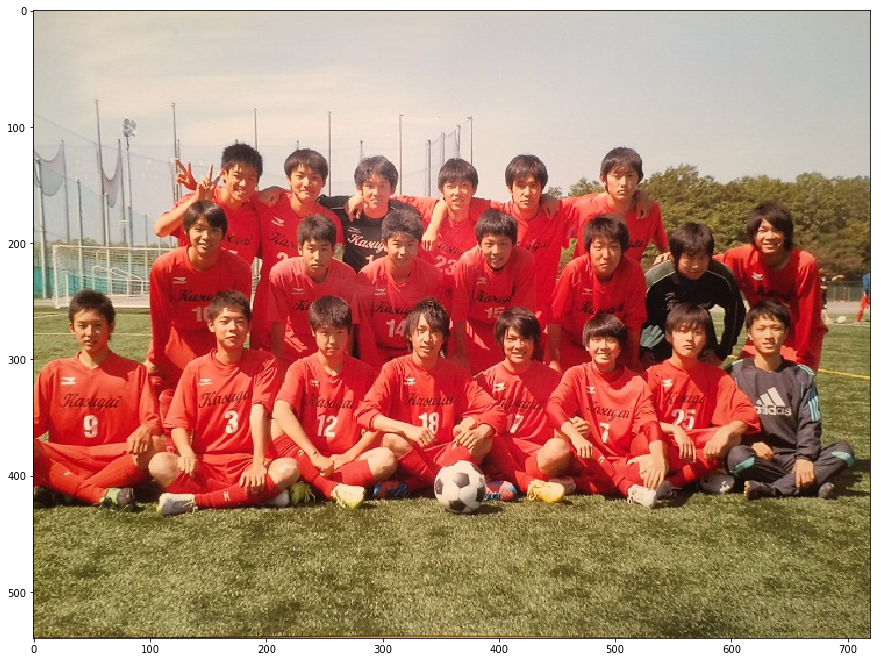

In [6]:
plt.figure(figsize=(15,15))
plt.imshow(img,interpolation  = 'none')

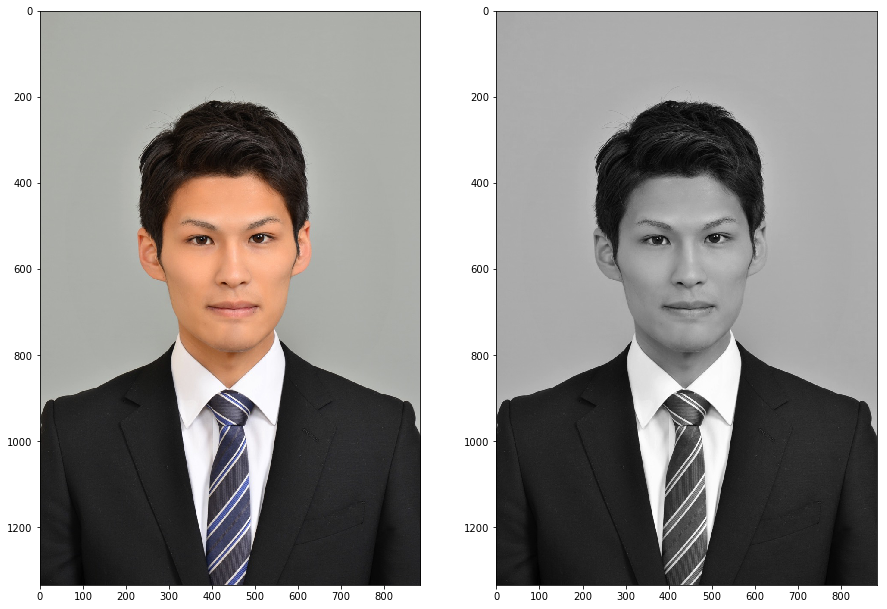

In [8]:
img_face=cv2.imread("../dataset/syuukatu.JPG") 
img_face = util.color_adjust(img_face)

gray_face = cv2.cvtColor(img_face,cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(15,15))

plt.subplot(1,2,1)
plt.imshow(img_face)

plt.subplot(1,2,2)
plt.imshow(gray_face , cmap = 'gray')

In [9]:
facecascade = cv2.CascadeClassifier("../xml/haarcascade_frontalface_default.xml")#facecascade xmlをロード

In [10]:
imp.reload(util)
facerect1 = facecascade.detectMultiScale(img_face, scaleFactor=1.1, minNeighbors=1, minSize=(1, 1))
facerect2 = facecascade.detectMultiScale(gray_face, scaleFactor=1.1, minNeighbors=1, minSize=(1, 1))
facerectALL = facecascade.detectMultiScale(img, scaleFactor=1.1, minNeighbors=1, minSize=(1, 1))

#scaleFactor探索窓の大きさを表す。例えば、1.1であれば、10％大きくなる。
#minNeighbors-1した値が近傍矩形（くけい）の最小値。つまり、1.1の場合、0.1より小さい矩形しか含まない矩形は削除される。
#minSize探索窓の最小サイズ。

facerectALL = util.fix_face_location(facerectALL)

facerectangle_RefarenceURL:http://opencv.jp/opencv-2svn/py/objdetect_cascade_classification.html

In [11]:
print(len(facerect1))
print(len(facerect2))
print(len(facerectALL))

3
3
19


In [12]:
print(facerectALL)#[x座標、y座標、横幅（ワイド）、縦幅（ハイ）]

[[179 620  29  29]
 [131 219  32  32]
 [178 134  30  30]
 [140 280  30  30]
 [190 383  30  30]
 [140 350  30  30]
 [140 410  31  31]
 [130 492  34  34]
 [193 228  34  34]
 [193 476  33  33]
 [469 611  29  29]
 [255 155  33  33]
 [256  29  40  40]
 [262 616  32  32]
 [260 602  37  37]
 [264 322  34  34]
 [274 476  29  29]
 [266 550  30  30]
 [272 401  30  30]]


In [13]:
#color = (255, 255, 0) #白

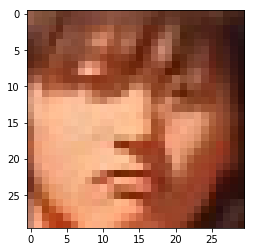

In [14]:
faceIndex  = 17#17番目に検出した顔
faceLoc = facerectALL[faceIndex]#faceLocをfacerectALLの中のfaceIndex（今は17番目の顔）で定義。

imgloc = util.extract_image(img, faceLoc)
plt.imshow(imgloc)

In [15]:
imp.reload(util)
newimg = util.draw_rectangle(img, faceLoc, thickness = 3, color=[255,255,0])

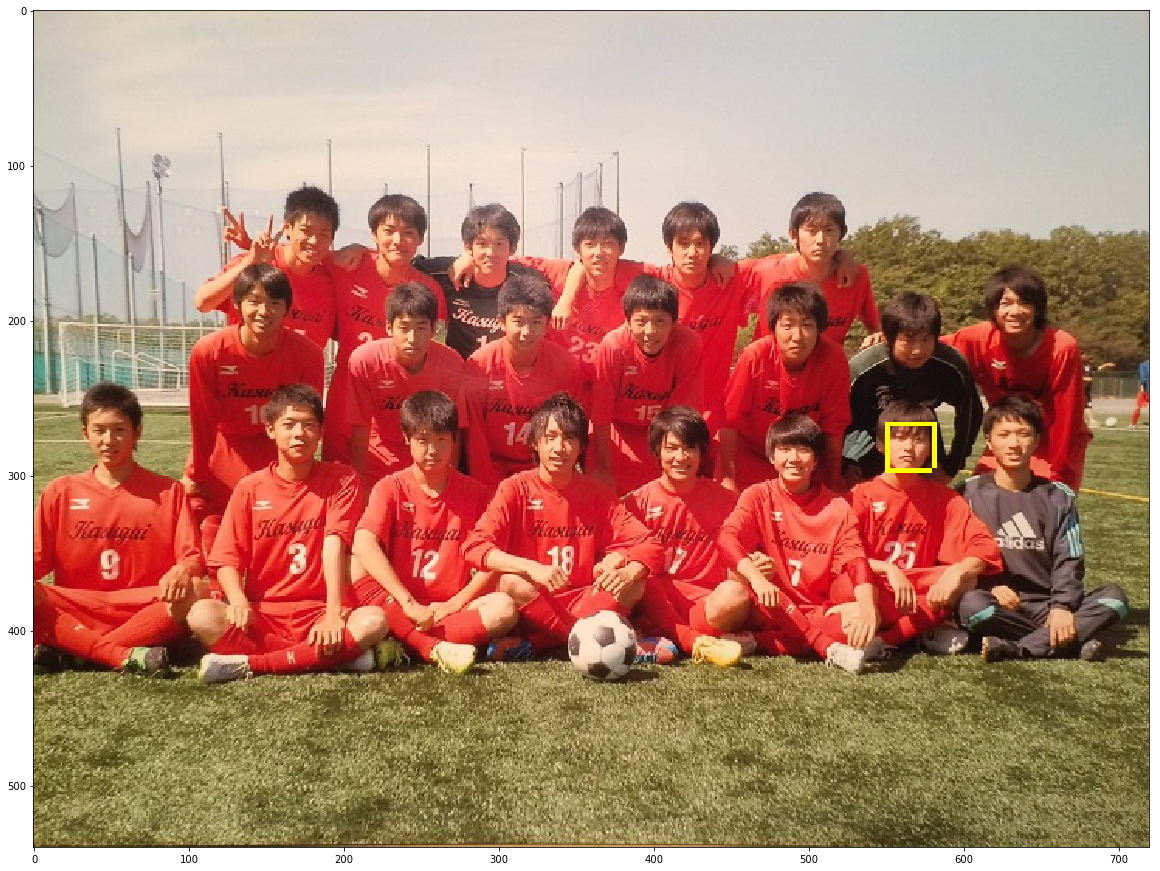

In [16]:
plt.figure(figsize = (20,20) )
plt.imshow(newimg)

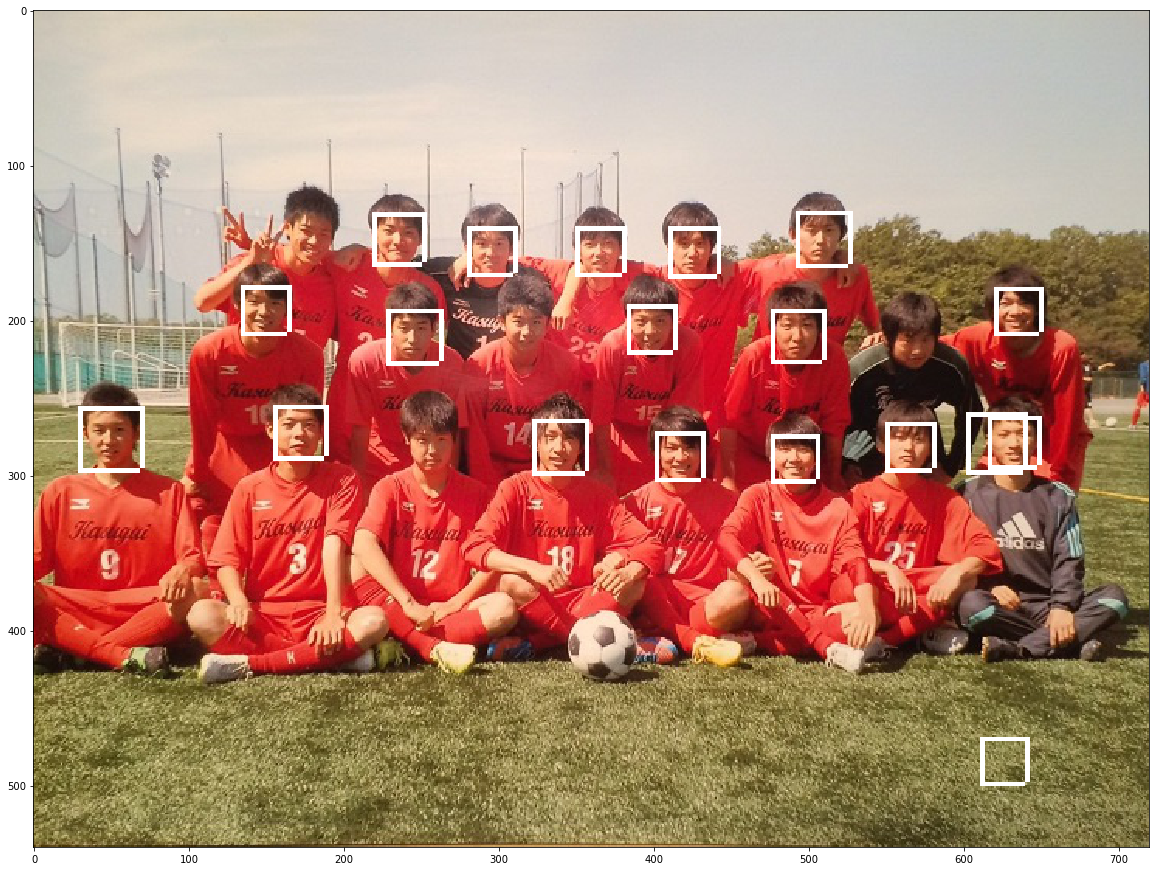

In [17]:
newimg= util.draw_multiple_rectangles(img, facerectALL, thickness = 3, save = True)

1


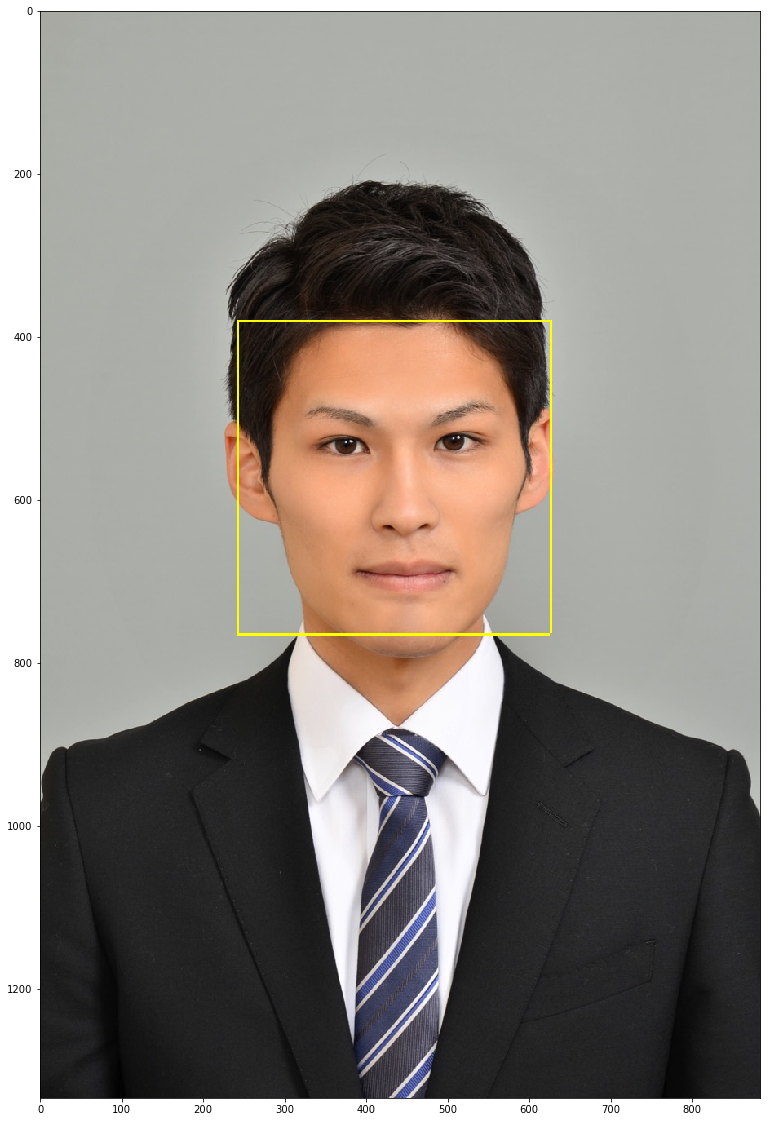

In [18]:
facerect3 = facecascade.detectMultiScale(img_face,scaleFactor=2.0,minNeighbors=int(1.1),minSize=(1, 1))# 探索(画像,縮小スケール,最低矩形数)
facerect3 = util.fix_face_location(facerect3)
print(len(facerect3))
newimg2=util.draw_multiple_rectangles(img_face, facerect3, thickness = 3, color=(255,255,0), save = True)

HAAR_RefarenceURL:http://qiita.com/wwacky/items/98d8be2844fa1b778323